In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#### **Dataset** : https://www.kaggle.com/code/sonalisingh1411/linear-regression-using-weight-height/input

In [6]:
df = pd.read_csv('weight-height.csv')

In [7]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [9]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [10]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [15]:
df.shape

(10000, 3)

In [17]:
df.size

30000

In [20]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [21]:
df.columns.value_counts()

Gender    1
Height    1
Weight    1
Name: count, dtype: int64

In [22]:
df['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

In [38]:
### Visualization

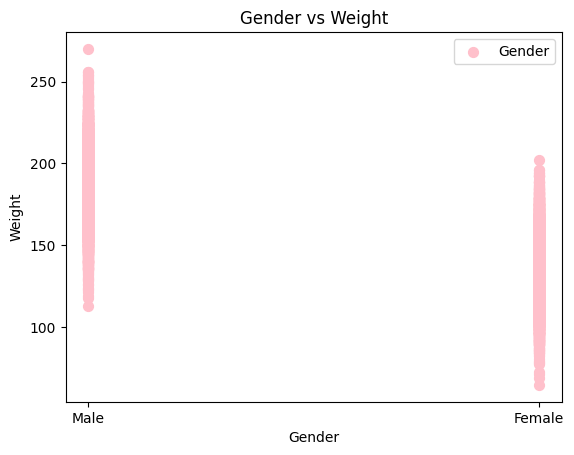

In [44]:
## Scatter Plot (Gender vs Weight)
x1 = df.iloc[:, 0].values
y1 = df.iloc[:, 2].values
plt.scatter(x1,y1,label='Gender',color='Pink',s=50)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Gender vs Weight')
plt.legend()
plt.show()

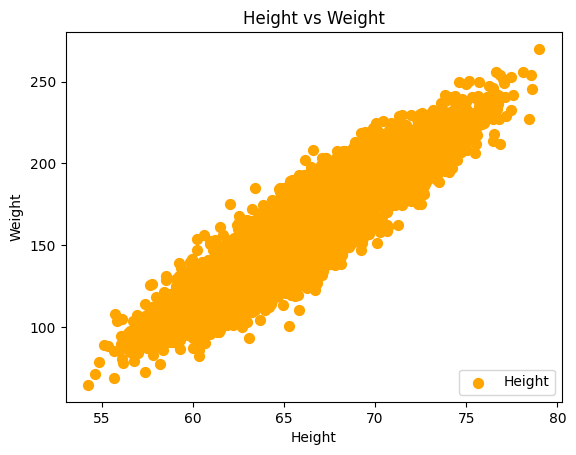

In [46]:
#Plot Height vs Weight
x2 = df.iloc[:, 1].values
y2 = df.iloc[:, 2].values
plt.scatter(x2,y2,label='Height',color='Orange',s=50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend(loc="lower right")
plt.show()

C:\Users\Deepak Yadav\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


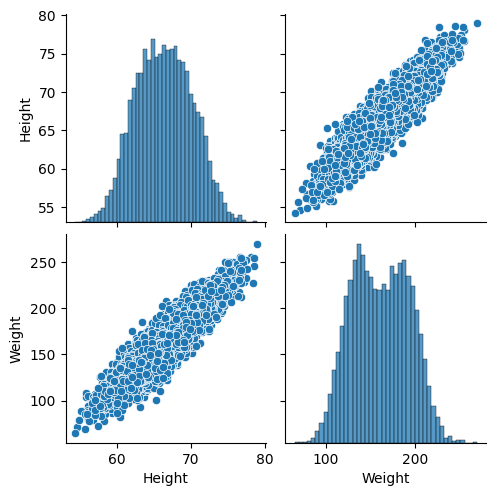

In [47]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [51]:
## Independent and Dependent Features
X = df.iloc[:, 1:2]
print(X)

         Height
0     73.847017
1     68.781904
2     74.110105
3     71.730978
4     69.881796
...         ...
9995  66.172652
9996  67.067155
9997  63.867992
9998  69.034243
9999  61.944246

[10000 rows x 1 columns]


In [53]:
y = df.iloc[:, 2].values
print(y)

[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]


In [54]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [55]:
#  linear model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predicting the test set
y_pred = regressor.predict(X_test)

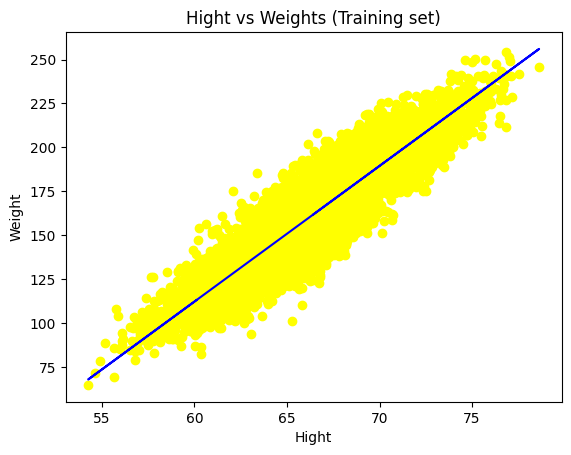

In [56]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'Yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs Weights (Training set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()

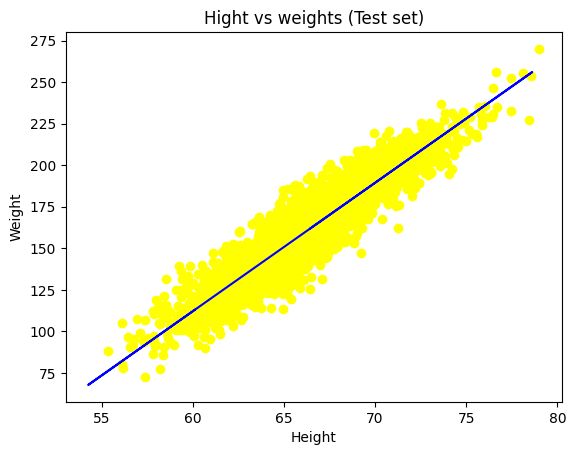

In [57]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'Yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs weights (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [58]:
## Checking the accuracy
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print('Coefficients: ', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Coefficients:  [7.72896259]
Mean squared error: 143.23
Variance score: 0.86
